# LFV Higgs decays in the 2HDM with  SeeSaw type I

In [1]:
from sympy import init_printing,lambdify,Symbol, symbols, Matrix
init_printing()
import OneLoopLFVHD as lfvhd

In [2]:
from FF_symbolic import TrianglesOneFermion, TrianglesTwoFermion, Bubbles
from FF_symbolic import DiagramasWninj,DiagramasniWW,DiagramasniWH,DiagramasniHW
from FF_symbolic import DiagramasHninj,DiagramasniHH
from FF_symbolic import g, mW, mG, mHpm, mϕ, Uν, Uνc, mn, m, C, Cc, a,b,i
from FF_symbolic import j as jj
from FF_symbolic import ξlϕ, ξnϕ, ξlA, ξnA,α, β, Ξϕ, Kϕ, Qϕ,ρϕ, Δϕ,ηϕ, λ5

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from mpmath import *

In [5]:
mp.dps = 80; mp.pretty = True

In [6]:
import numpy as np

In [7]:
from multiprocessing import Pool, cpu_count
from time import time

In [8]:
cpu_count()

In [9]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    pool.close()
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [10]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [11]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

## Setting 2HDM

### Form factor with one fermion in the loop.

In [12]:
# for D in TrianglesOneFermion:
#     display(D.AL().atoms(Symbol))

#### AL one fermion 

In [13]:
from OneLoopLFVHD.data import ml

In [14]:
ma,mb = symbols('m_a,m_b',positive=True)
# valores_h ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
# valores_H ={mW:mpf('80.379'),mh:mpf('125.10'),g:(2*mpf('80.379'))/mpf('246')}
valoresSM ={mW:mpf('80.379'),g:(2*mpf('80.379'))/mpf('246')}

# cambios_hab = lambda a,b:{lfvhd.ma:valores_h[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}
cambios_lab = lambda mla,mlb:{lfvhd.mi:mla,lfvhd.mj:mlb}



Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

# from Unu_seesaw_2HDM import diagonalizationMnu
# diagonalizationMnu1 = lambda m1,m6,tb,doblet: diagonalizationMnu(
#     m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6,tb,doblet)

from Unu_seesaw import diagonalizationMnu

diagonalizationMnu1 = lambda m1,m6: diagonalizationMnu(
    m1,m2,m3,m6/mpf('3.0'),m6/mpf('2.0'),m6)

In [15]:
C0_sp, C1_sp, C2_sp, B120_sp, B10_sp,B11_sp,B20_sp,B21_sp = symbols('C0, C1, C2, B120, B10,B11,B20,B21')
cambios_pave_sympy = lambda M0,M1,M2: {lfvhd.C0(M0,M1,M2):C0_sp,lfvhd.C1(M0,M1,M2):C1_sp,
                                      lfvhd.C2(M0,M1,M2):C2_sp,lfvhd.B12_0(M1,M2):B120_sp,
                                      lfvhd.B1_0(M0,M1):B10_sp,lfvhd.B1_1(M0,M1):B11_sp,
                                      lfvhd.B2_0(M0,M2):B20_sp,lfvhd.B2_1(M0,M2):B21_sp}
cambiosniWW = cambios_pave_sympy(mn[i],mW,mW)
cambiosniWH = cambios_pave_sympy(mn[i],mW,mHpm)
cambiosniHW = cambios_pave_sympy(mn[i],mHpm,mW)
cambiosniHH = cambios_pave_sympy(mn[i],mHpm,mHpm)

cambiosWninj = cambios_pave_sympy(mW,mn[i],mn[jj])
cambiosHninj = cambios_pave_sympy(mHpm,mn[i],mn[jj])

#cambiosniWW

In [16]:
import OneLoopLFVHD.LFVHDFeynG_mpmath2 as lfvhd_mp# B1_0, B2_0, B1_1, B2_1, B12_0, C0, C1, C2

### Diagrams with One Fermion

#### Diagrams with $n_i WW$ numeric

In [17]:
####################
mW_val = valoresSM[mW]
C0_mp_niWW = lambda ms,mni_: lfvhd_mp.C0(ms,mni_,mW_val,mW_val)
C1_mp_niWW = lambda ms,mni_,mla: lfvhd_mp.C1(ms,mla,mni_,mW_val,mW_val)
C2_mp_niWW = lambda ms,mni_,mlb: lfvhd_mp.C2(ms,mlb,mni_,mW_val,mW_val)
B120_mp_niWW = lambda ms: lfvhd_mp.B12_0(ms,mW_val,mW_val)
B10_mp_niWW = lambda mni_,mla: lfvhd_mp.B1_0(mla,mni_,mW_val)
B11_mp_niWW = lambda mni_,mla: lfvhd_mp.B1_1(mla,mni_,mW_val)
B20_mp_niWW = lambda mni_,mlb: lfvhd_mp.B2_0(mlb,mni_,mW_val)
B21_mp_niWW = lambda mni_,mlb: lfvhd_mp.B2_1(mlb,mni_,mW_val)

FF_list_niWW = []
for dia_niWW in DiagramasniWW:
    A_sp_niWWL = lambda mla,mlb: dia_niWW.AL().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niWWR = lambda mla,mlb: dia_niWW.AR().subs(cambiosniWW).subs(lfvhd.D,4).subs(
            lfvhd.B12_0(mW,mW),0).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)


    #display(A_sp_niWWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niWWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWL(mla,mlb),'mpmath')

    A_lamb_niWWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ,
                   C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niWWR(mla,mlb),'mpmath')
    #print(A_lamb_niWWL(ml[2],ml[3])(1,2,3,4,5,6,7,8,9,10,11,12,13,14))


    def FFniWWL(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
        return  A_lamb_niWWL(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))

    def FFniWWR(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
        return A_lamb_niWWR(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
                C0_mp_niWW(ms,mni_),C1_mp_niWW(ms,mni_,mla),C2_mp_niWW(ms,mni_,mlb),
                B120_mp_niWW(ms),B10_mp_niWW(mni_,mla),B11_mp_niWW(mni_,mla),B20_mp_niWW(mni_,mlb),B21_mp_niWW(mni_,mlb))

    FF_list_niWW.append({'L':FFniWWL,'R':FFniWWR})
    

In [18]:
%%time
(
    FF_list_niWW[0]['L'](mpf('125.10'),2,3,4,5,6,7,8),
    FF_list_niWW[0]['R'](mpf('125.10'),2,3,4,5,6,7,8)
)

CPU times: user 1.49 s, sys: 8.61 ms, total: 1.5 s
Wall time: 1.5 s


(-0.000071467763684591091970099230113171227717941258139891604327269425120638084533901643,
 -0.00007142927748439662077718032879884293845337609638931117236903147334185704219854227)

In [19]:
###################3
# def diagramas_niWW_func_dict(ms,mla,mlb,m6):
#     C0mp =  C0_mp_niWW(ms,mni),
#     C1mp =  C1_mp_niWW(ms,mni,mla),
#     C2mp =  C2_mp_niWW(ms,mni,mlb),
#     B120mp =  B120_mp_niWW(ms),
#     B10mp =  B10_mp_niWW(mni,mla),
#     B11mp =  B11_mp_niWW(mni,mla),
#     B20mp =  B20_mp_niWW(mni,mlb),
#     B21mp =  B21_mp_niWW(mni,mlb)
#     FF_list_niWW = []

#     #lfvhd.ma,mni,Ubi,Ucai, Ξϕ,ξlϕ, 
#     #C0_sp,C1_sp,C2_sp,B120_sp,B10_sp,B11_sp,B20_sp,B21_sp
#     for A_dia_niWW in FF_list_niWW:
#         def FFniWWL(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
#             return A_lamb_niWWL(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
#                     C0mp,C1mp,C2mp,B120mp,B10mp,B11mp,B20mp,B21mp)

#         def FFniWWR(ms,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi):
#             return A_lamb_niWWR(mla,mlb)(ms,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi,
#                     C0mp,C1mp,C2mp,B120mp,B10mp,B11mp,B20mp,B21mp)


#     return FF_list_niWW


#diagramas_niWW_func_dict(125,1,2,3)


#### Diagrams with $n_i HH$ numeric

In [20]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHH = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mHpm,mHpm)
C1_mp_niHH = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mHpm,mHpm)
C2_mp_niHH = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mHpm,mHpm)
B10_mp_niHH = lambda mni_,mla,mHpm: lfvhd_mp.B1_0(mla,mni_,mHpm)
B11_mp_niHH = lambda mni_,mla,mHpm: lfvhd_mp.B1_1(mla,mni_,mHpm)
B20_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_mp.B2_0(mlb,mni_,mHpm)
B21_mp_niHH = lambda mni_,mlb,mHpm: lfvhd_mp.B2_1(mlb,mni_,mHpm)

###################3
FF_list_niHH = []
for dia_niHH in DiagramasniHH:
    A_sp_niHHL = lambda mla,mlb: dia_niHH.AL().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niHHR = lambda mla,mlb: dia_niHH.AR().subs(cambiosniHH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    
    #display(A_sp_niHHL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,β,λ5,ξlϕ,ξlA,ξnA,Δφ,Kφ,Qφ,ρφ,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHL(mla,mlb),'mpmath')
    
    A_lamb_niHHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,β,λ5,ξlϕ,ξlA,ξnA,Δφ,Kφ,Qφ,ρφ,
                   C0_sp,C1_sp,C2_sp,B10_sp,B11_sp,B20_sp,B21_sp],
                                           A_sp_niHHR(mla,mlb),'mpmath')
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniHHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,
           mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi):
        return A_lamb_niHHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                      mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    def FFniHHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,
           mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi):
        return A_lamb_niHHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                      mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi,
                C0_mp_niHH(ms_val,mni_,mHpm),C1_mp_niHH(ms_val,mni_,mla,mHpm),
                C2_mp_niHH(ms_val,mni_,mlb,mHpm),
                B10_mp_niHH(mni_,mla,mHpm),B11_mp_niHH(mni_,mla,mHpm),
                 B20_mp_niHH(mni_,mlb,mHpm),B21_mp_niHH(mni_,mlb,mHpm))
    
    FF_list_niHH.append({'L':FFniHHL,'R':FFniHHR})

In [21]:
(
    FF_list_niHH[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16),
    FF_list_niHH[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13,.14,.15,.16)
)

((-0.000000000000047500694437883334053559689281938324690014047870947545178873981810238639959485919 + 0.0j),
 (-0.00000000000004236342443704504832816313444557555323754466162073906839989234059953380424683953 + 0.0j))

#### Diagrams with $n_i WH$ numeric

In [22]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niWH = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mW_val,mHpm)
C1_mp_niWH = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mW_val,mHpm)
C2_mp_niWH = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mW_val,mHpm)

###################3

FF_list_niWH = []
for dia_niWH in DiagramasniWH:
    A_sp_niWHL = lambda mla,mlb: dia_niWH.AL().subs(
    lfvhd.B12_0(mW,mHpm),0).subs(cambiosniWH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niWHR = lambda mla,mlb: dia_niWH.AR().subs(
    lfvhd.B12_0(mW,mHpm),0).subs(cambiosniWH).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    
    #display(A_sp_niWHR(ml[1],ml[2]))
    A_lamb_niWHL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHL(mla,mlb),'mpmath')
    
    A_lamb_niWHR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niWHR(mla,mlb),'mpmath')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFniWHL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niWHL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    def FFniWHR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niWHR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niWH(ms_val,mni_,mHpm),C1_mp_niWH(ms_val,mni_,mla,mHpm),
                C2_mp_niWH(ms_val,mni_,mlb,mHpm))
    
    FF_list_niWH.append({'L':FFniWHL,'R':FFniWHR})

In [23]:
(
    FF_list_niWH[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niWH[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((0.00000000000073997220271423127802355085382835647883922673782242773334953810398722701909869346 - 0.000000000030972455173014969569412999398979601144283827253638731873356056557309910688187441j),
 (0.0000000000022159945644866799364720886135057752606885085978152774628812580245231190029519501 + 0.000000000047450065059135105309675310387106043334229343472607187787881746423645666725534121j))

#### Diagrams with $n_i HW$ numeric

In [24]:
####################
####################
#ms = symbols('m_s',real=True)
C0_mp_niHW = lambda ms,mni_,mHpm: lfvhd_mp.C0(ms,mni_,mHpm,mW_val)
C1_mp_niHW = lambda ms,mni_,mla,mHpm: lfvhd_mp.C1(ms,mla,mni_,mHpm,mW_val)
C2_mp_niHW = lambda ms,mni_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mni_,mHpm,mW_val)

###################3

FF_list_niHW = []
for dia_niHW in DiagramasniHW:
    A_sp_niHWL = lambda mla,mlb: dia_niHW.AL().subs(
    lfvhd.B12_0(mHpm,mW),0).subs(cambiosniHW).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    A_sp_niHWR = lambda mla,mlb: dia_niHW.AR().subs(
    lfvhd.B12_0(mHpm,mW),0).subs(cambiosniHW).subs(lfvhd.D,4).simplify().subs(
        cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuOne)
    
    #display(A_sp_niHWL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_niHWL = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWL(mla,mlb),'mpmath')
    
    A_lamb_niHWR = lambda mla,mlb: lambdify([lfvhd.ma,mni,Ubi,Ucai,mHpm,ξlA,ξnA,ηφ,
                   C0_sp,C1_sp,C2_sp], A_sp_niHWR(mla,mlb),'mpmath')
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))

    def FFniHWL(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niHWL(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    def FFniHWR(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi):
        return A_lamb_niHWR(mla,mlb)(ms_val,mni_,Ubi_,Ucai_,
                mHpm,xi_lA,xi_nA,etaphi,
                C0_mp_niHW(ms_val,mni_,mHpm),C1_mp_niHW(ms_val,mni_,mla,mHpm),
                C2_mp_niHW(ms_val,mni_,mlb,mHpm))
    
    FF_list_niHW.append({'L':FFniHWL,'R':FFniHWR})

In [25]:
(
    FF_list_niHW[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_niHW[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

((0.0000000000016186245566964131191393371679933937460040188537979129023017212404503112497240921 + 0.000000000027856042353106289647878200508351370522313134908851938289887465179759227860630087j),
 (0.0000000000030100644084983342550328491097069874180219927409172959725370374902666231611707073 - 0.000000000040901945715217446434061162515643564950401398841443523235003581343896279883614529j))

In [26]:
# for FF_dict in FF_list_niWH:
#     #display(FF_dict['L'])    
#     print(FF_dict['L'](mpf('125.10'),2,3,4,5,6,7,8,9,10))

### Diagrams with two fermions

In [27]:
## Internal funtions TwoFermion

mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}

#### Diagrams with $W n_i n_j$ numeric

In [28]:
C0_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_mp.C0(ms,mW_val,mni_,mnj_)
C1_mp_Wninj = lambda ms,mni_,mnj_,mla: lfvhd_mp.C1(ms,mla,mW_val,mni_,mnj_)
C2_mp_Wninj = lambda ms,mni_,mnj_,mlb: lfvhd_mp.C2(ms,mlb,mW_val,mni_,mnj_)
B120_mp_Wninj = lambda ms,mni_,mnj_: lfvhd_mp.B12_0(ms,mni_,mnj_)

FF_list_Wninj = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
for dia_Wninj in DiagramasWninj:
    A_sp_WninjL = lambda mla,mlb: dia_Wninj.AL().subs(cambiosWninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    A_sp_WninjR = lambda mla,mlb: dia_Wninj.AR().subs(cambiosWninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    
    
    #display(A_sp_WninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_WninjL = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,ξnϕ,
                   C0_sp,C1_sp,B120_sp], A_sp_WninjL(mla,mlb),'mpmath')
    
    A_lamb_WninjR = lambda mla,mlb: lambdify([lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,ξnϕ,
                   C0_sp,C2_sp,B120_sp], A_sp_WninjR(mla,mlb),'mpmath')
    
    
    #.subs(typeI_ξh).subs(common_factor_h).subs(lfvhd.ma,mh).subs(mh,mpf('125.10'))
    def FFWninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi):
        return A_lamb_WninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi,
            C0_mp_Wninj(ms_val,mni_,mnj_),C1_mp_Wninj(ms_val,mni_,mnj_,mla),
            B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    def FFWninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi):
        return A_lamb_WninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,xi_nphi,
            C0_mp_Wninj(ms_val,mni_,mnj_),
            C2_mp_Wninj(ms_val,mni_,mnj_,mlb),B120_mp_Wninj(ms_val,mni_,mnj_)
        )
    
    FF_list_Wninj.append({'L':FFWninjL,'R':FFWninjR})#
    

In [29]:
%%time
(
    FF_list_Wninj[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10),
    FF_list_Wninj[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10)
)

CPU times: user 1.49 s, sys: 12.3 ms, total: 1.5 s
Wall time: 1.5 s


((0.0000000000017705687573692845226223810390110502256328238815664976911335516705846002800290829 - 0.000000000027896947980710833082089199285464130145801616380458756295392473804415769560146124j),
 (0.0000000000022906273006951853616036766415218922091906210117015523657757105853688588301671254 - 0.000000000039382506274601512958113572101742007705343883191515987986071884978427412632233882j))

#### Diagrams with $H n_i n_j$ numeric

In [30]:
C0_mp_Hninj = lambda ms,mni_,mnj_,mHpm: lfvhd_mp.C0(ms,mHpm,mni_,mnj_)
C1_mp_Hninj = lambda ms,mni_,mnj_,mla,mHpm: lfvhd_mp.C1(ms,mla,mHpm,mni_,mnj_)
C2_mp_Hninj = lambda ms,mni_,mnj_,mlb,mHpm: lfvhd_mp.C2(ms,mlb,mHpm,mni_,mnj_)
B120_mp_Hninj = lambda ms,mni_,mnj_: lfvhd_mp.B12_0(ms,mni_,mnj_)

#FF_dicts1 = []#.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuTwo)
FF_list_Hninj = []
for dia_Hninj in DiagramasHninj:
    A_sp_HninjL = lambda mla,mlb: dia_Hninj.AL().subs(cambiosHninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    A_sp_HninjR = lambda mla,mlb: dia_Hninj.AR().subs(cambiosHninj).subs(lfvhd.D,4
                    ).simplify().subs(cambios_lab(mla,mlb)).subs(valoresSM).subs(UnuTwo)
    
    
    #display(A_sp_HninjL(ml[1],ml[2]).atoms(Symbol))
    A_lamb_HninjL = lambda mla,mlb: lambdify(
        [
            lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
            ξnϕ,ξnA,ξlA,C0_sp,C1_sp,C2_sp,B120_sp
            ], A_sp_HninjL(mla,mlb),'mpmath')
    
    A_lamb_HninjR = lambda mla,mlb: lambdify(
        [
            lfvhd.ma,mni,mnj,Ubj,Ucai,Cijs,Cijcs,mHpm,
            ξnϕ,ξnA,ξlA,C0_sp,C1_sp,C2_sp,B120_sp
            ], A_sp_HninjR(mla,mlb),'mpmath')
    
    #FF_dicts1.append({'L':A_lamb_HninjL,'R':A_lamb_HninjR})
    
    #for dictFF in FF_dicts1:
    def FFHninjL(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                xi_nphi,xi_nA,xi_lA):
        return A_lamb_HninjL(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            xi_nphi,xi_nA,xi_lA,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    def FFHninjR(ms_val,mla,mlb,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
                xi_nphi,xi_nA,xi_lA):
        return A_lamb_HninjR(mla,mlb)(
            ms_val,mni_,mnj_,Ubj_,Ucai_,Cijs_,Cijcs_,mHpm,
            xi_nphi,xi_nA,xi_lA,
            C0_mp_Hninj(ms_val,mni_,mnj_,mHpm),C1_mp_Hninj(ms_val,mni_,mnj_,mla,mHpm),
            C2_mp_Hninj(ms_val,mni_,mnj_,mlb,mHpm),B120_mp_Hninj(ms_val,mni_,mnj_)
        )
    FF_list_Hninj.append({'L':FFHninjL,'R':FFHninjR})

In [31]:
%%time
(
    FF_list_Hninj[0]['L'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13),
    FF_list_Hninj[0]['R'](mpf('125.10'),.2,.3,.4,.5,.6,.7,.8,.9,.10,.11,.12,.13)
)

CPU times: user 9.62 s, sys: 315 µs, total: 9.62 s
Wall time: 9.65 s


((0.0000000000003567424273110642758754818137234537643188627944602530353340147113119297077800788 - 0.00000000000014647975419882433747957415124397106246415294901433072809760218424470669069469899j),
 (0.00000000000043373979285590803253763899246677015633638807064745524500178254147041359767655619 - 0.00000000000017807838430186369275684514226616192034594327132568622038835301673397475388937348j))

In [32]:
# l_niWW = len(FF_list_niWW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi
# l_niWH = len(FF_list_niWH) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHW = len(FF_list_niHW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHH = len(FF_list_niHH) #(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,
#                            #beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
m6 = mpf('1e15')
mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)

def sum_diagrams(aa,bb,ms_val,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L'):
    
    # mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    FFOne = 0
    for k in range(1,7):
        for FF_dict in FF_list_niWW:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            Xi_phi,xi_lphi)
        
        for FF_dict in FF_list_niHW:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,xi_lA,xi_nA,etaphi)
        
        for FF_dict in FF_list_niWH:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,xi_lA,xi_nA,etaphi)
            
        for FF_dict in FF_list_niHH:
            FFOne += FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
    
    FFTwo = 0
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    for p in range(1,7):
        for q in range(1,7):
            for FF_dict in FF_list_Wninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),xi_nphi)
            
            for FF_dict in FF_list_Hninj:
                FFTwo += FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                mHpm,xi_nphi,xi_nA,xi_lA)
    FFtotal = FFTwo + FFOne
    return FFtotal

In [33]:
# l_niWW = len(FF_list_niWW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,Xi_phi,xi_lphi
# l_niWH = len(FF_list_niWH) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,FFTwo = sum_Wninj + sum_HninjmHpm,xi_lA,xi_nA,etaphi
# l_niHW = len(FF_list_niHW) #ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,xi_lA,xi_nA,etaphi
# l_niHH = len(FF_list_niHH) #(ms_val,mla,mlb,mni_,Ubi_,Ucai_,mHpm,
#                            #beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)

def sum_diagrams2(aa,bb,ms_val,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L'):
    
    # mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    sum_niWW = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            Xi_phi,xi_lphi)
            for FF_dict in FF_list_niWW for k in range(1,7))
        
    sum_niHW = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,xi_lA,xi_nA,etaphi) 
            for FF_dict in FF_list_niHW for k in range(1,7))
        
    sum_niWH = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,xi_lA,xi_nA,etaphi)
            for FF_dict in FF_list_niWH for k in range(1,7))
            
    sum_niHH = sum(FF_dict[quirality](ms_val,mla,mlb,
            mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
            mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
            for FF_dict in FF_list_niHH for k in range(1,7))

    FFOne = sum_niHH + sum_niWH + sum_niHW + sum_niWW
    Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    sum_Wninj = sum(FF_dict[quirality](ms_val,mla,mlb,
    mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
    Cij(p-1,q-1),conj(Cij(p-1,q-1)),xi_nphi)
    for FF_dict in FF_list_Wninj for p in range(1,7) for q in range(1,7))
            
    sum_Hninj = sum(FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                mHpm,xi_nphi,xi_nA,xi_lA)
                for FF_dict in FF_list_Hninj for p in range(1,7) for q in range(1,7))
    FFTwo = sum_Wninj + sum_Hninj
    FFtotal = FFTwo + FFOne
    return FFtotal

In [34]:
Cij = lambda i,j: mp.fsum([UnuL[c,i]*UnuR[j,c] for c in range(3)])

In [43]:
def sum_diagrams3(aa,bb,ms_val,mHpm,beta,l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality='L'):
    
    # mnk,UnuL,UnuR = diagonalizationMnu1(m1,m6)
    Unu = UnuL
    Unu_dagger = UnuR
    mla = ml[aa]
    mlb = ml[bb]
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    
    # sum_niWW = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         Xi_phi,xi_lphi)
    #         for FF_dict in FF_list_niWW for k in range(1,7))
        
    # sum_niHW = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         mHpm,xi_lA,xi_nA,etaphi) 
    #         for FF_dict in FF_list_niHW for k in range(1,7))
        
    # sum_niWH = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         mHpm,xi_lA,xi_nA,etaphi)
    #         for FF_dict in FF_list_niWH for k in range(1,7))
            
    # sum_niHH = fsum(FF_dict[quirality](ms_val,mla,mlb,
    #         mnk[k-1],Unu[bb-1,k-1],Unu_dagger[k-1,aa-1],
    #         mHpm,beta,l5,xi_lphi,xi_lA,xi_nA,Dphi,Kphi,Qphi,rhophi)
    #         for FF_dict in FF_list_niHH for k in range(1,7))

    #FFOne = sum_niWW + sum_niWH + sum_niHW + sum_niHH
    # Cij = lambda i,j: mp.fsum([Unu[c,i]*Unu_dagger[j,c] for c in range(3)])

    sum_Wninj = fsum(
        FF_dict[quirality](ms_val,mla,mlb,
        mnk[p-1],mnk[q-1],Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
        Cij(p-1,q-1),conj(Cij(p-1,q-1)),xi_nphi)
    for FF_dict in [FF_list_Wninj[0]] for p in range(1,7) for q in range(1,7)
    if not (p < 4 and q < 4))
            
    sum_Hninj = fsum(FF_dict[quirality](ms_val,mla,mlb,
                mnk[p-1],mnk[q-1],
                Unu[bb-1,q-1],Unu_dagger[p-1,aa-1],
                Cij(p-1,q-1),conj(Cij(p-1,q-1)),
                mHpm,xi_nphi,xi_nA,xi_lA)
                for FF_dict in FF_list_Hninj for p in range(1,7) for q in range(1,7)
                if not (p < 4 and q < 4))
    FFTwo = sum_Wninj + sum_Hninj
    #FFtotal = FFTwo + FFOne
    return FFTwo # FFtotal

In [44]:
mh = mpf('125.10')
mHval = mpf('1500')

In [53]:
%%time

suma1 = sum_diagrams(1,2,mh,mHval,6,7,
                    8,9,10,11,12,13,14,15,16,17,'L')
suma1

CPU times: user 4min 44s, sys: 1.41 s, total: 4min 46s
Wall time: 4min 46s


(-0.000000000000000000054130799444637403052790568759518810228890374257386066578821857086484980874166894 - 8.1762162012609468496227276174030793615045136039681736054483999488372050055202991e-29j)

In [54]:
%%time

suma2 = sum_diagrams2(1,2,mh,mHval,6,7,
                    8,9,10,11,12,13,14,15,16,17,'L')
suma2

CPU times: user 3min 56s, sys: 1.24 s, total: 3min 57s
Wall time: 3min 56s


(-0.000000000000000000054130799444637403052790568759518810228890374257386066578821857086497637682883654 - 8.1762162012609468496227276174030793615045136039681736054483999489810261031364435e-29j)

In [45]:
%%time

suma3 = sum_diagrams3(1,2,mh,mHval,6,7,
                    8,9,10,11,12,13,14,15,16,17,'L')
suma3

CPU times: user 2min 18s, sys: 124 ms, total: 2min 18s
Wall time: 2min 19s


(-0.000000000000000000054130799424207996766123704864589494398409866979960339136390320133414415175066634 + 8.1766645746489321345561756062626411410396162860290915650334010975328488881263289e-63j)

In [55]:
abs(suma3/suma1)

0.99999999962259182280671444697416924239805832533402363912254426923601898885822349

In [56]:
from modelos_2HDM import typeI_h, typeII_h, Lepton_specific_h,Flipped_h, alphaf, betaf

In [57]:

def numeric_sum_diagrams(ms,a,b,mHpm, mA, cab, l5,
                            type_2HDM=typeI_h,quirality='L'):
    if quirality=='L':
        pass
    elif quirality=='R':
        pass
    else:
        raise ValueError('quirality must be L or R')
    Kphi =  4*mA**2 - 3*ms**2- 2*mHpm**2
    Qphi = ms**2 - 2*mHpm**2
    
    def FFOne(tb):
        Yuk_common = type_2HDM(tb,cab)
        xi_lphi, xi_nphi, xi_lA, xi_nA, Xi_phi, etaphi,rhophi,Dphi = Yuk_common
        out = sum_diagrams3(a,b,ms,mHpm,betaf(tb),l5,
                   xi_lphi,xi_lA,xi_nphi,xi_nA,Xi_phi,Dphi,Kphi,Qphi,rhophi,etaphi,quirality)
        return out
    return FFOne

In [40]:
%%time
nprint(numeric_sum_diagrams(mpf('500.1'),1,2,mpf('550'), mpf('600'), 0.1, 0.2,
                               type_2HDM=typeI_h,quirality='L')(mpf('1e-12')))

(-2.08217e+12 - 5.21752e-33j)
CPU times: user 2min 17s, sys: 158 ms, total: 2min 18s
Wall time: 2min 18s


## Total Form Factors

In [58]:

def ALtot23(ms,mHpm, mA, tb, cab, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,2,3,mHpm, mA, cab, l5,
                                   type_2HDM=type_2HDM,quirality='L')(tb)
def ARtot23(ms,mHpm, mA, tb, cab, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,2,3,mHpm, mA, cab, l5,
                                   type_2HDM=type_2HDM,quirality='R')(tb)


def ALtot13(ms,mHpm, mA, tb, cab, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,3,mHpm, mA, cab, l5,
                                   type_2HDM=type_2HDM,quirality='L')(tb)
def ARtot13(ms,mHpm, mA, tb, cab, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,3,mHpm, mA, cab, l5,
                                   type_2HDM=type_2HDM,quirality='R')(tb)


def ALtot12(ms,mHpm, mA, tb, cab, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,2,mHpm, mA, cab, l5,
                                   type_2HDM=type_2HDM,quirality='L')(tb)
def ARtot12(ms,mHpm, mA, tb, cab, l5,type_2HDM=typeI_h):
    return numeric_sum_diagrams(ms,1,2,mHpm, mA, cab, l5,
                                   type_2HDM=type_2HDM,quirality='R')(tb)


In [42]:
%%time
nprint(ALtot23(mpf('125.1'),mpf('500'), mpf('600'), 0.1, 0.2, 0.2,
type_2HDM=typeI_h))

(-6.54432e-58 - 3.66843e-11j)
CPU times: user 2min 14s, sys: 144 ms, total: 2min 14s
Wall time: 2min 14s


## Width decay of $h \to e_a e_b$

In [59]:
from OneLoopLFVHD import Γhlilj 
# def Γhlilj(ML,MR,ma=mpf('125.18'),mi=ml[2],mj=ml[3]):
#     r = 1/(8 *pi* ma)*sqrt((1-((mi**2+mj**2)/ma)**2)*(1-((mi**2-mj**2)/ma)**2))*((ma**2 - mi**2 - mj**2)*(abs(ML)**2 + abs(MR)**2)-4*mi*mj*re(ML*conj(MR)))
#     return r

In [60]:
mHpm_val = mp.mpf('1500.0') 
mA_val = mp.mpf('1300.0') 
l5_val = mp.mpf('1') 
# m6_val = mp.mpf('1e15')
cab_val = mpf('0.01')
mh_val = mpf('125.1')
# Φ =2

In [61]:
def Γhl2l3_2HDM(tb,type_2HDM=typeI_h):
    AL = ALtot23(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val,type_2HDM=type_2HDM)
    AR = ARtot23(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[2],mj=ml[3])
    # mla = ml[aa]
    # mlb = ml[bb]
def Γhl1l3_2HDM(tb,type_2HDM=typeI_h):
    AL = ALtot13(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val,type_2HDM=type_2HDM)
    AR = ARtot13(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[1],mj=ml[3])

def Γhl1l2_2HDM(tb,type_2HDM=typeI_h):
    AL = ALtot12(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val,type_2HDM=type_2HDM)
    AR = ARtot12(ms=mh_val,mHpm=mHpm_val, mA=mA_val,
                 tb=tb, cab=cab_val, l5=l5_val,type_2HDM=type_2HDM)
    return Γhlilj(AL,AR,ma=mh_val,mi=ml[1],mj=ml[2])

In [50]:
%%time 
nprint(Γhl1l2_2HDM(0.1,type_2HDM=typeI_h))

2.48412e-29
2.48412e-29
CPU times: user 9min 31s, sys: 407 ms, total: 9min 31s
Wall time: 9min 34s


In [62]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array) 
    result = np.array(list(pool))
    #pool.close()
    return result

In [63]:
n = 2
# tbmp = linspace(0.1,100,n)
expmp = linspace(-1,2,n)
tbmp = np.array([mpf('10.0')**k for k in expmp])#np.logspace(-1,15,n)

In [44]:
%%time
YW23 = speedup_array(Γhl2l3_2HDM,tbmp)

YW13 = speedup_array(Γhl1l3_2HDM,tbmp)

YW12 = speedup_array(Γhl1l2_2HDM,tbmp)
    # mla = ml[aa]
    # mlb = ml[bb]


CPU times: user 1.17 s, sys: 463 ms, total: 1.63 s
Wall time: 17min 12s


In [47]:
Wtot = YW23 + YW13 + YW12 + 0.0032

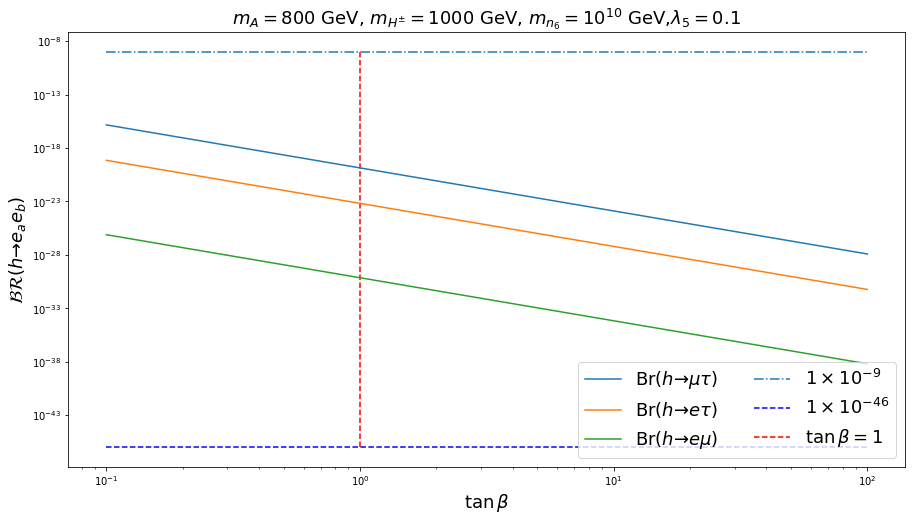

In [48]:
plt.figure(figsize=(15,8))
plt.loglog(np.real(tbmp),(YW23)/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(tbmp),(YW13)/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(tbmp),(YW12)/Wtot,label=r'Br($h \to e \mu$)')

# Horizontal lines
plt.hlines(1e-9,0.1,1e2,linestyles='-.',label=r'$1\times 10^{-9}$')
plt.hlines(1e-46,0.1,1e2,linestyles='--',color='b',label=r'$1\times 10^{-46}$')

# Vertical lines
plt.vlines(1,1e-46,1e-9,linestyles='--',color='r',label=r'$\tan{\beta}=1$')

#Axis
#plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=18)
#plt.xticks([0.1,1,10,100],fontsize=18)
plt.xlabel(r'$\tan{\beta}$',fontsize=18)
plt.ylabel(r'$\mathcal{BR}(h \to e_a e_b)$',fontsize=18)


plt.title(r'$m_A=800$ GeV, $m_{H^{\pm}}=1000$ GeV, $m_{n_6}={10^{10}}$ GeV,$\lambda_5=0.1$',fontsize=18)
plt.legend(fontsize=18,frameon=True,ncol=2,loc=4)
#plt.savefig('2HDM-lepton-specific-Cba0.95-caso5.png',dpi=100)

In [66]:
import pandas as pd

In [67]:
df = pd.DataFrame({'tb':tbmp,
                   'Whl2l3':YW23,
                   #'Whl3l2':YW32,
                   'Whl1l3':YW13,
                   #'Whl3l1':YW31,
                   'Whl1l2':YW12})
                   #'Whl2l1':YW21})

In [68]:
df.to_csv('Lepton_specific_Cab095_caso5_mA800_mHpm1000.txt',sep='\t')

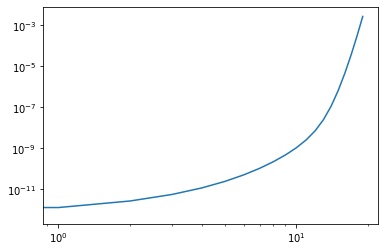

In [69]:
plt.loglog(np.array(list(map(mpf,df['tb']))),np.array(list(map(mpf,df['Whl2l3']))))